In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRIM='2'
filename = '/home/rgrimson/Downloads/EPH/INDIVIDUAL_T'+TRIM+'_GBA.csv'
df=pd.read_csv(filename,dtype={'Nro_Vivienda':str})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130512 entries, 0 to 130511
Data columns (total 23 columns):
Unnamed: 0        130512 non-null int64
Nro_Vivienda      130512 non-null object
Nro_Hogar         130512 non-null int64
Componente        130512 non-null int64
Ano               130512 non-null int64
Trimestre         130512 non-null int64
Region            130512 non-null int64
Mas500            130512 non-null object
Aglomerado        130512 non-null int64
RelHogar          130512 non-null int64
Sexo              130512 non-null object
Edad              130512 non-null int64
NivelEd           130512 non-null int64
CondActividad     130512 non-null int64
CatOcupacion      130512 non-null int64
CatInactividad    130512 non-null int64
ServDomestico     117674 non-null float64
IngTI             130459 non-null float64
DIngTIG           130512 non-null int64
DIngTIL           130512 non-null int64
IngTF             130512 non-null int64
DIngTFG           130512 non-null int64
DI

In [4]:
dg=df[df['IngTI']>0].copy()

IngTI_MedioAnual=dg[['Ano','IngTI']].groupby('Ano').mean()
dg['IngRel']=dg['IngTI']
for ANO in IngTI_MedioAnual.index:
    dg.loc[dg['Ano']==ANO,'IngRel']=dg[dg['Ano']==ANO]['IngTI']/IngTI_MedioAnual.loc[ANO].values

cota=4
I=dg['IngRel'].values.copy()
I[I>cota]=cota
dg['IngRel_']=I


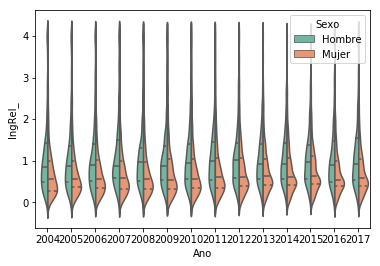

In [19]:
sns.violinplot(x='Ano',y='IngRel_', hue='Sexo', palette="Set2", split=True, scale="area", inner="quartile", data=dg, hue_order=['Hombre','Mujer'])

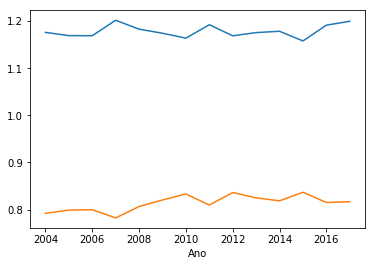

In [6]:
#sueldos promedios
di=dg.groupby(['Sexo','Ano']).mean()['IngRel']
di['Hombre'].plot()
di['Mujer'].plot()

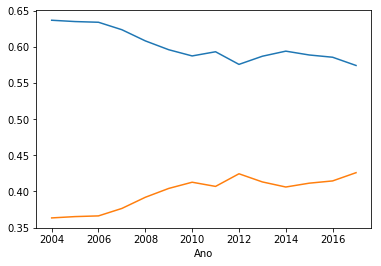

In [7]:
#repartija de guita
dt=dg.groupby(['Ano']).sum()['IngRel']
dj=dg.groupby(['Sexo','Ano']).sum()['IngRel']/dt
dj['Hombre'].plot()
dj['Mujer'].plot()

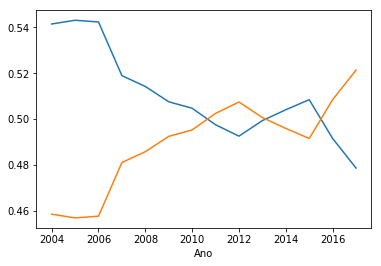

In [8]:
#cant de laburantes / total laburante
dH=dg[dg['Sexo']=='Hombre']
dM=dg[dg['Sexo']=='Mujer']
T=dg.groupby('Ano').count()['IngTI']
dPH=dH.groupby('Ano').count()['IngTI']/T
dPM=dM.groupby('Ano').count()['IngTI']/T
dPH.plot()
dPM.plot()


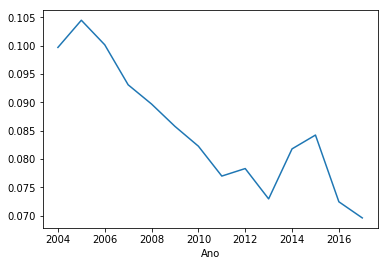

In [9]:
#cant am@s de casa / total encuestados
T=df.groupby('Ano').count()['IngTI'].values
(df[df.CatInactividad==4].groupby('Ano').count()['IngTI']/T).plot()

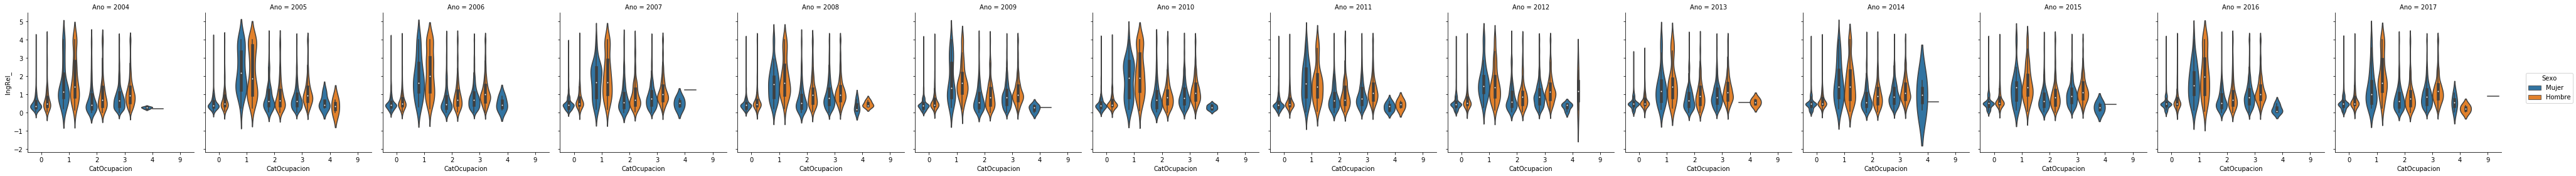

In [10]:
sns.factorplot(x="CatOcupacion", y="IngRel_", hue="Sexo",
               col="Ano", data=dg, kind="violin");

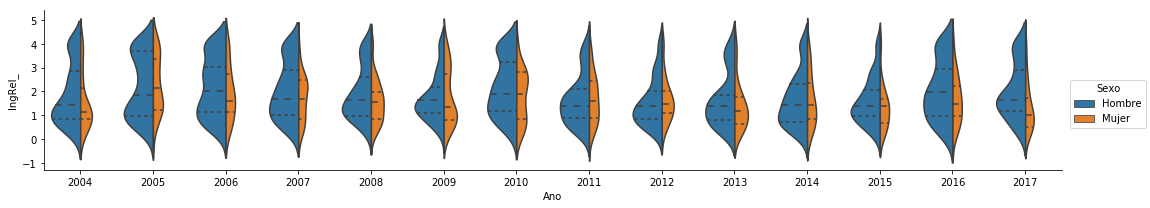

In [16]:
#Ingresos por sexo para Patrones
sns.factorplot(x="Ano", y="IngRel_", hue="Sexo", data=dg[dg["CatOcupacion"]==1], kind="violin",split=True, scale="count", inner="quartile",size=3, aspect=5, hue_order=['Hombre','Mujer']);

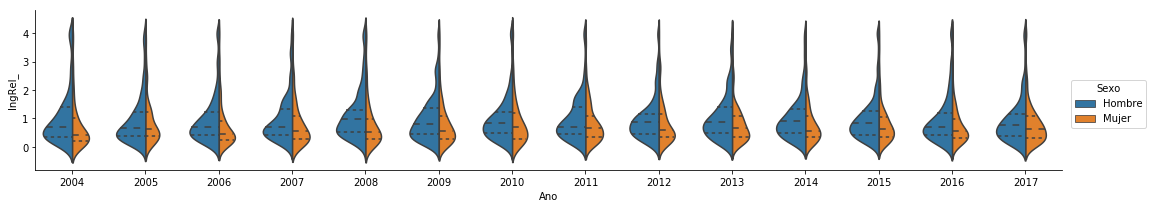

In [17]:
#Ingresos por sexo para CuentaPropistas
sns.factorplot(x="Ano", y="IngRel_", hue="Sexo", data=dg[dg["CatOcupacion"]==2], kind="violin",split=True, scale="count", inner="quartile",size=3, aspect=5, hue_order=['Hombre','Mujer']);

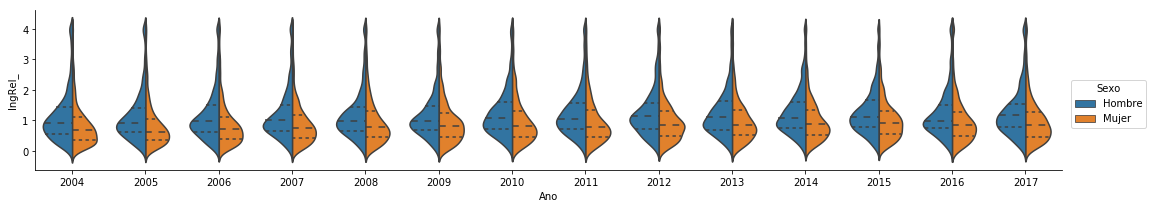

In [18]:
#Ingresos por sexo para Empleados
sns.factorplot(x="Ano", y="IngRel_", hue="Sexo", data=dg[dg["CatOcupacion"]==3], kind="violin",split=True, scale="count", inner="quartile",size=3, aspect=5, hue_order=['Hombre','Mujer']);

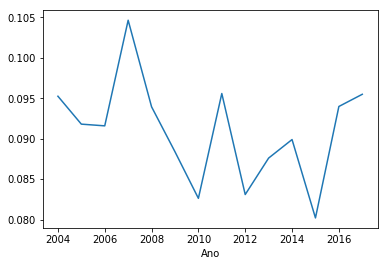

In [14]:
#cant de laburantes / total laburante
dH=dg[dg['Sexo']=='Hombre']
dM=dg[dg['Sexo']=='Mujer']
T=dg.groupby('Ano').count()['IngTI']
dPH=dH.groupby('Ano').count()['IngTI']/T
dPM=dM.groupby('Ano').count()['IngTI']/T

#repartija de guita
dt=dg.groupby(['Ano']).sum()['IngRel']
dj=dg.groupby(['Sexo','Ano']).sum()['IngRel']/dt
dGH=dj['Hombre']
dGM=dj['Mujer']

dCG=dGH-dPH
dCG.plot()

In [20]:
dCG #inter generos CoefGini

Ano
2004    0.095254
2005    0.091803
2006    0.091590
2007    0.104653
2008    0.093946
2009    0.088386
2010    0.082625
2011    0.095590
2012    0.083094
2013    0.087604
2014    0.089896
2015    0.080203
2016    0.093985
2017    0.095495
dtype: float64

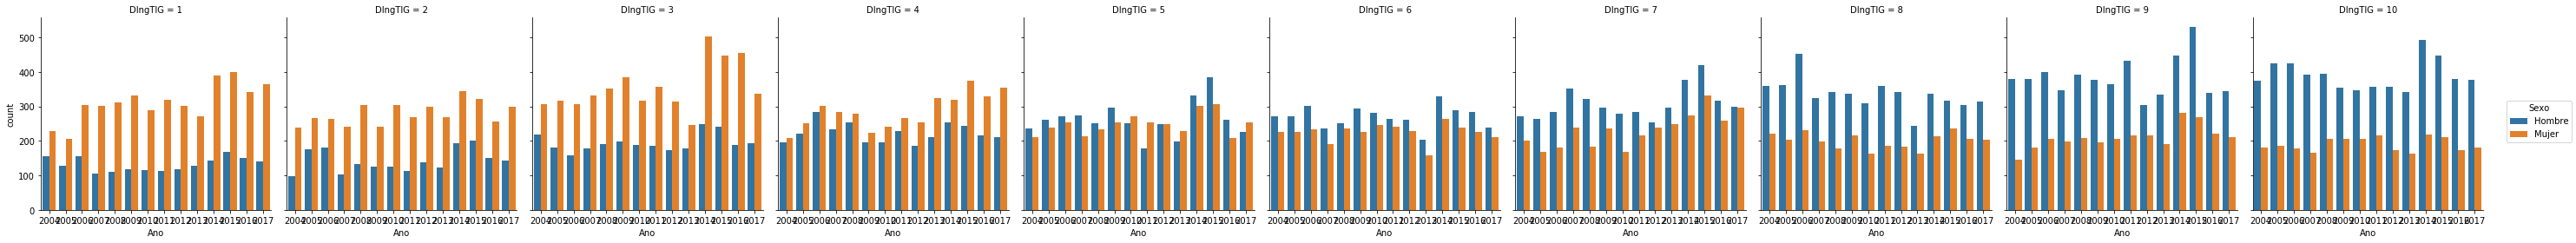

In [25]:
sns.factorplot(x='Ano',col='DIngTIG', hue='Sexo', data=dg, hue_order=['Hombre','Mujer'],kind="count")